# Health Care Insurance Analysis

## About
 This project contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

- Age: The insured person's age.

- Sex: Gender (male or female) of the insured.

- BMI (Body Mass Index): A measure of body fat based on height and weight.

- Children: The number of dependents covered.

- Smoker: Whether the insured is a smoker (yes or no).

- Region: The geographic area of coverage.

- Charges: The medical insurance costs incurred by the insured person.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
copy_df=df

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Data Processing

In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(1337, 7)

In [17]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Transformation/Encoding
 - Converting categorical variables (sex,smoker,region) into numerical format using one-hot encoding

In [19]:
encoded_data=pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [20]:
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


## Standralization

In [21]:
numerical_cols=['age','bmi','children','charges'] #excluding the one-hot encoded columns

scaler=StandardScaler()
encoded_data[numerical_cols]=scaler.fit_transform(encoded_data[numerical_cols])

In [22]:
standardized_overview=encoded_data.head(10)
standardized_overview

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,True,False,False,True,False,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,False,True,True,False,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,False,True,True,False,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,False,True,True,False,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,False,True,True,False,False,True,False,False
5,-0.585661,-0.807363,-0.909234,-0.786604,True,False,True,False,False,False,True,False
6,0.482785,0.455307,-0.079442,-0.416207,True,False,True,False,False,False,True,False
7,-0.158282,-0.479397,1.580143,-0.495432,True,False,True,False,False,True,False,False
8,-0.158282,-0.136672,0.750351,-0.567719,False,True,True,False,True,False,False,False
9,1.480002,-0.790965,-0.909234,1.292271,True,False,True,False,False,True,False,False


- The standardizing of numerical columns is adopted to ensure that numerical data is on a consistent scale. for example: If one dataset measures weight in kilograms and another in pounds, standardization might involve converting all values to kilograms.

## Exploratory Data Analysis (EDA)

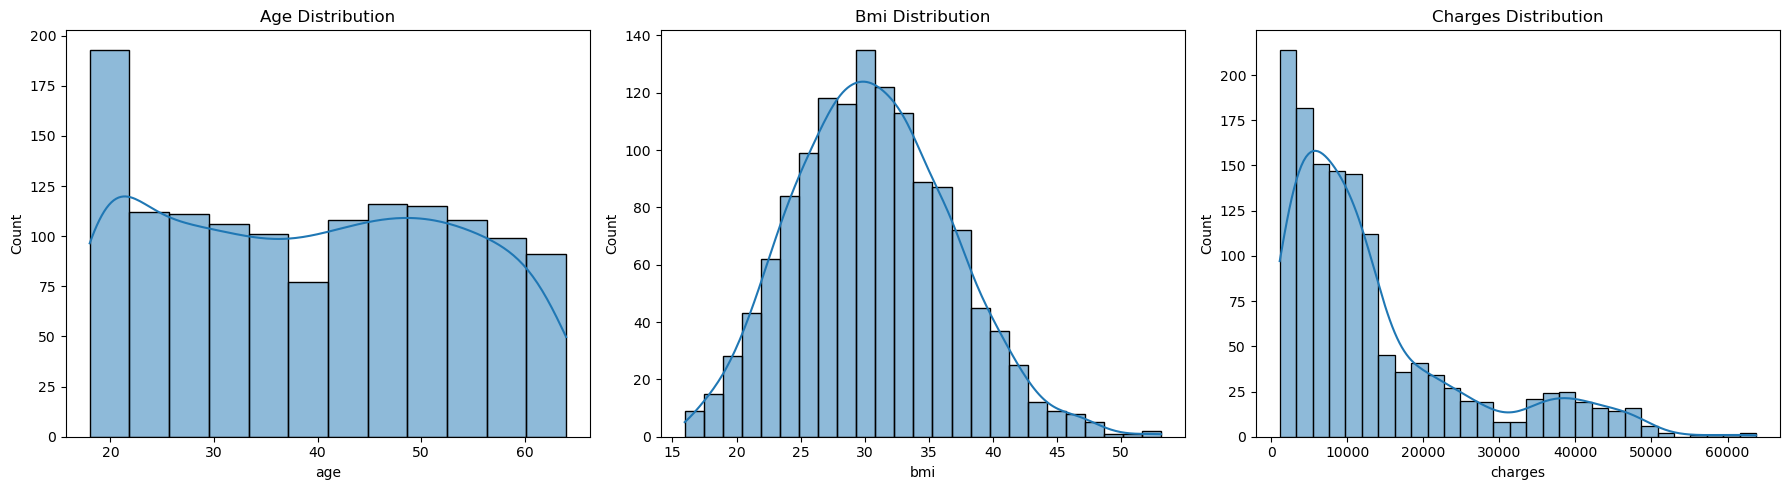

In [23]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Bmi Distribution')

sns.histplot(df['charges'], kde=True, ax=axes[2])
axes[2].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

- The histograms show that age has a left-skewed distribution with a higher frequency of younger individuals.
- BMI appears normally distributed centered around the 30 mark. 
- Charges are right-skewed, indicating a higher frequency of lower charges with fewer instances of very high charges.

<Axes: xlabel='age'>

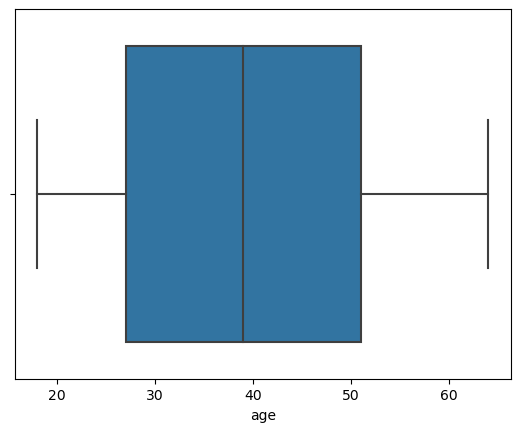

In [24]:
sns.boxplot(x=df["age"])

<Axes: xlabel='bmi'>

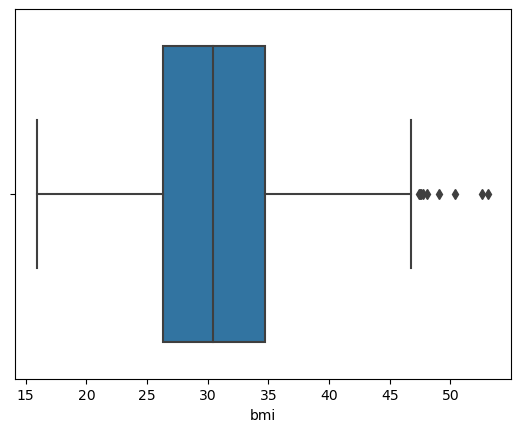

In [25]:
sns.boxplot(x=df["bmi"])

<Axes: xlabel='charges'>

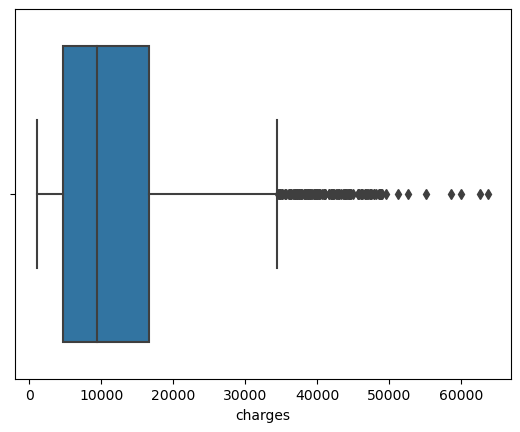

In [26]:
sns.boxplot(x=df["charges"])

<Axes: xlabel='children'>

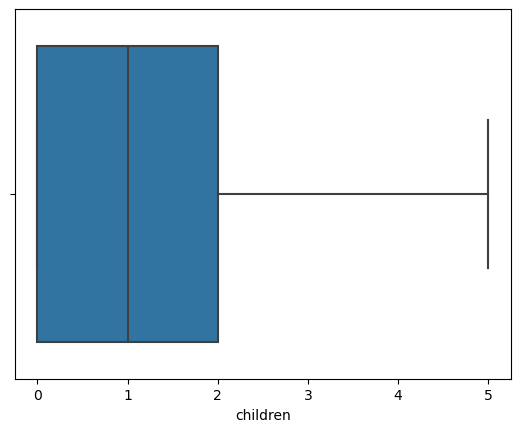

In [27]:
sns.boxplot(x=df["children"])

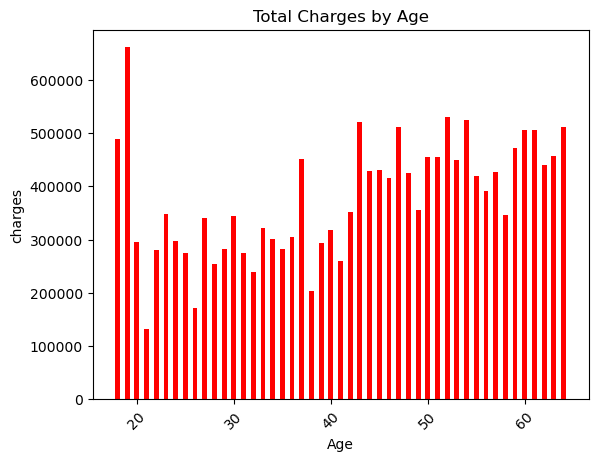

In [28]:
charges_by_age=df.groupby('age')['charges'].sum()

plt.bar(charges_by_age.index, charges_by_age.values, color='red', width=.50)

plt.xlabel('Age')
plt.ylabel('charges')

plt.title('Total Charges by Age')

plt.xticks(rotation=45) #optional

plt.show()

- The bar chart suggests total healthcare charges tend to increase with age. There are higher charges in the early 20s and again in the 60s.

<function matplotlib.pyplot.show(close=None, block=None)>

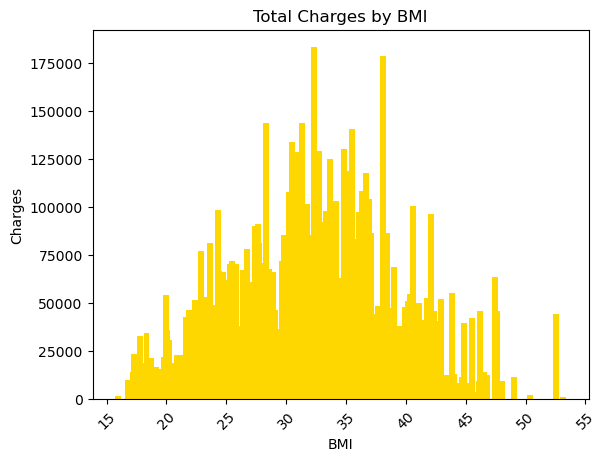

In [29]:
charges_by_bmi=df.groupby('bmi')['charges'].sum()

plt.bar(charges_by_bmi.index, charges_by_bmi.values, color='gold', width=.50)

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.title('Total Charges by BMI')

plt.xticks(rotation=45) #optional

plt.show

- The bar chart shows that total charges vary widely across different BMI values, with several peaks indicating higher total charges at certain BMI levels.

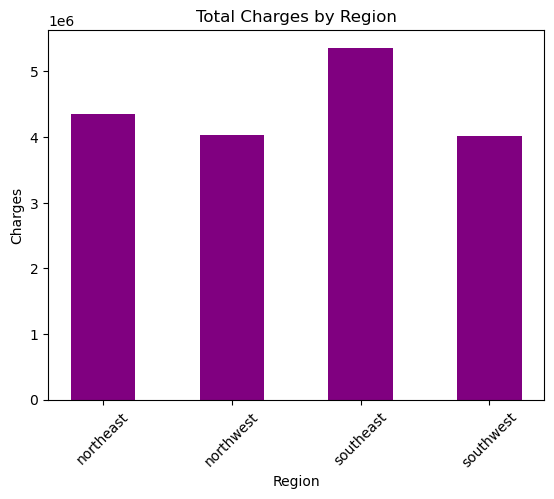

In [30]:
charges_by_region=df.groupby('region')['charges'].sum()

plt.bar(charges_by_region.index, charges_by_region.values, color='purple', width=.50)

plt.xlabel("Region")
plt.ylabel('Charges')

plt.title('Total Charges by Region')

plt.xticks(rotation=45) #optional

plt.show()

- The bar chart indicates that the southeast region incurs the highest total healthcare charges compared to the northeast, northwest, and southwest regions.

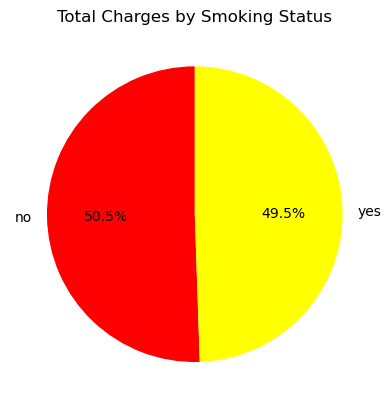

In [31]:
charges_by_smoker = df.groupby('smoker')['charges'].sum()

plt.pie(charges_by_smoker, labels=charges_by_smoker.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])

plt.title('Total Charges by Smoking Status')


plt.show()

- The pie chart shows an almost even split in total charges between smokers and non-smokers, with smokers paying slightly less, highlighting the higher impact of smoking status on insurance costs.

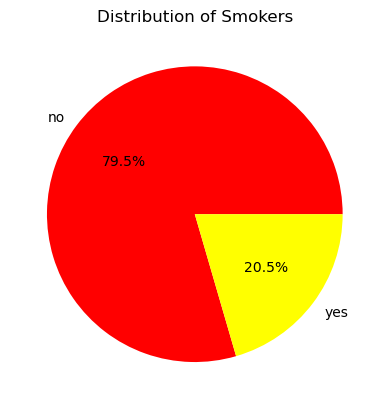

In [32]:
smoker_counts = df['smoker'].value_counts() 

plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['red', 'yellow']) 

plt.title('Distribution of Smokers') 

plt.show()

- 20.5% are smokers, and 79.5% are non-smokers.

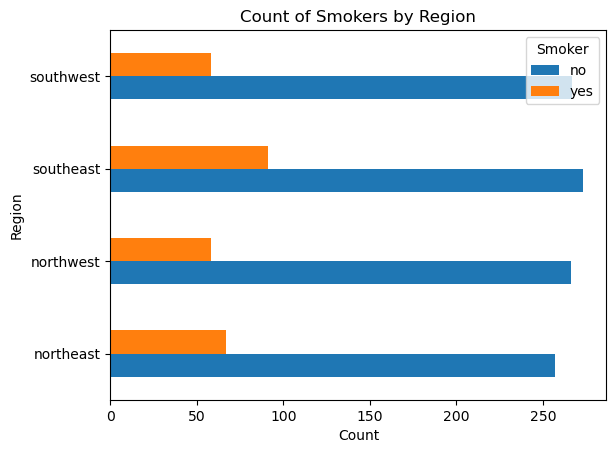

In [33]:
smokers_by_region = df.groupby('region')['smoker'].value_counts().unstack().fillna(0)

smokers_by_region.plot(kind='barh')

plt.xlabel('Count')
plt.ylabel('Region')

plt.title('Count of Smokers by Region')

plt.legend(title='Smoker', loc='upper right')
plt.show()

- The above plot shows that the number of smokers in the southest region is higher, the northeast is the 2nd highest, and there is a tie between the south and north-west.

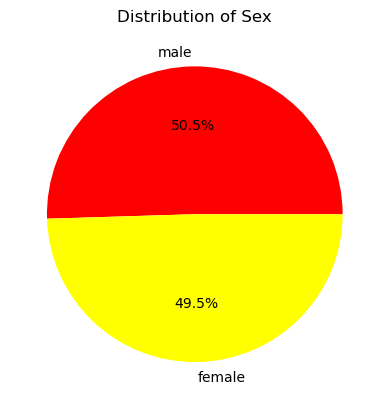

In [34]:
sex_count = df['sex'].value_counts() 

plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', colors=['red', 'yellow']) 

plt.title('Distribution of Sex') 

plt.show()

- 50.5% are males & 49.5% are females

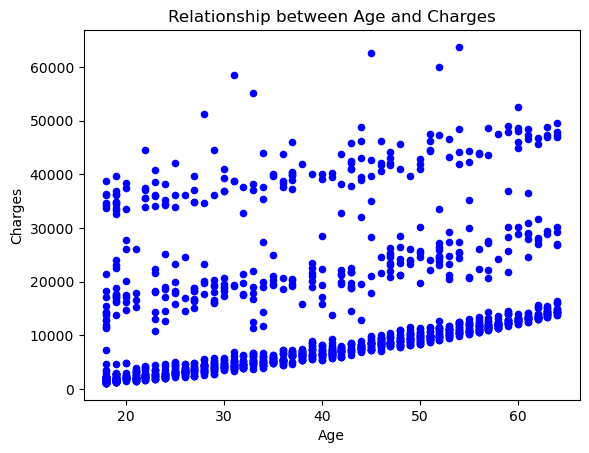

In [35]:
df.plot(kind='scatter', x='age', y='charges', color='blue')

plt.xlabel('Age')
plt.ylabel('Charges')

plt.title('Relationship between Age and Charges')

plt.show()

- The scatter plot suggests a positive correlation between age and charges, with a general trend of increasing charges as age increases and a wide variance in charges at any given age.

Text(0.5, 1.0, 'Average Charges vs Smoker')

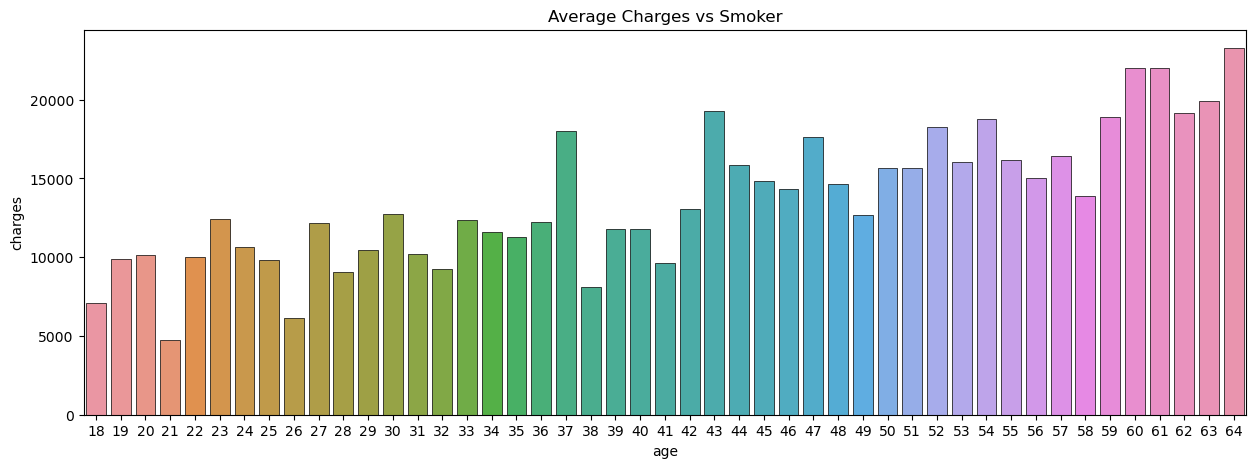

In [36]:
age_charges=df.groupby(["age"]).agg({"charges":['mean']})

plt.figure(figsize=(15, 5)) 

sns.barplot(df,x="age", y="charges", edgecolor='black',linewidth=0.5,errorbar=None)

plt.title("Average Charges vs Smoker")

- The bar plot suggests a positive correlation between age and charges, with a general trend of increasing charges as age increases and a wide variance in charges at any given age.

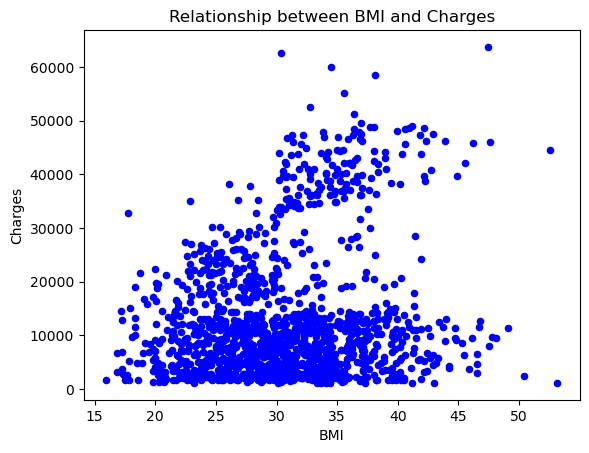

In [37]:
df.plot(kind='scatter', x='bmi', y='charges', color='blue')

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.title('Relationship between BMI and Charges')

plt.show()

- The scatter plot suggests a positive correlation between BMI and charges, with a general trend of increasing charges as BMI increases. It means the charges will increase if the BMI increases.

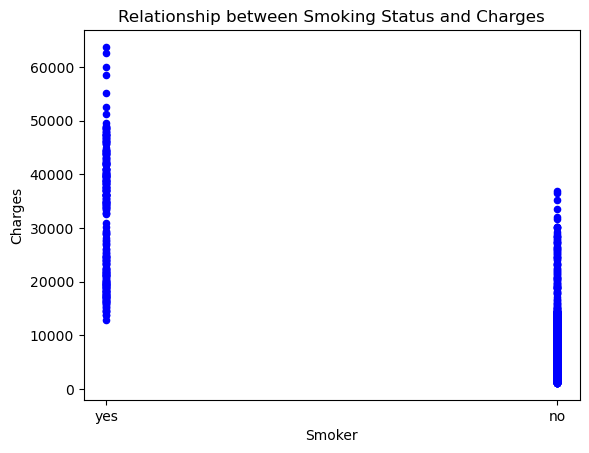

In [38]:
df.plot(kind='scatter', x='smoker', y='charges', color='blue')

plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.title('Relationship between Smoking Status and Charges')

plt.show()

- The scatter plot clearly indicates that smokers generally incur higher healthcare charges than non-smokers.

In [39]:
correlation_matrix = standardized_overview.corr()

correlation_matrix

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.238656,-0.057788,0.527067,3.846154e-01,-3.846154e-01,0.430199,-0.430199,0.082621,4.466306e-01,-2.337832e-01,-0.430199
bmi,-0.238656,1.000000,0.489713,-0.630311,-2.153746e-01,2.153746e-01,0.093925,-0.093925,0.090205,-6.060197e-01,6.082982e-01,-0.093925
children,-0.057788,0.489713,1.000000,-0.445348,-1.690309e-01,1.690309e-01,0.281718,-0.281718,0.281718,-1.725164e-01,1.725164e-01,-0.281718
charges,0.527067,-0.630311,-0.445348,1.000000,3.083615e-01,-3.083615e-01,-0.251934,0.251934,-0.152154,4.876104e-01,-5.487130e-01,0.251934
sex_female,0.384615,-0.215375,-0.169031,0.308361,1.000000e+00,-1.000000e+00,-0.333333,0.333333,-0.333333,-6.798700e-17,0.000000e+00,0.333333
sex_male,-0.384615,0.215375,0.169031,-0.308361,-1.000000e+00,1.000000e+00,0.333333,-0.333333,0.333333,-2.266233e-17,4.532467e-17,-0.333333
smoker_no,0.430199,0.093925,0.281718,-0.251934,-3.333333e-01,3.333333e-01,1.000000,-1.000000,0.111111,2.721655e-01,2.721655e-01,-1.000000
smoker_yes,-0.430199,-0.093925,-0.281718,0.251934,3.333333e-01,-3.333333e-01,-1.000000,1.000000,-0.111111,-2.721655e-01,-2.721655e-01,1.000000
region_northeast,0.082621,0.090205,0.281718,-0.152154,-3.333333e-01,3.333333e-01,0.111111,-0.111111,1.000000,-2.721655e-01,-2.721655e-01,-0.111111
region_northwest,0.446631,-0.606020,-0.172516,0.487610,-6.798700e-17,-2.266233e-17,0.272166,-0.272166,-0.272166,1.000000e+00,-6.666667e-01,-0.272166


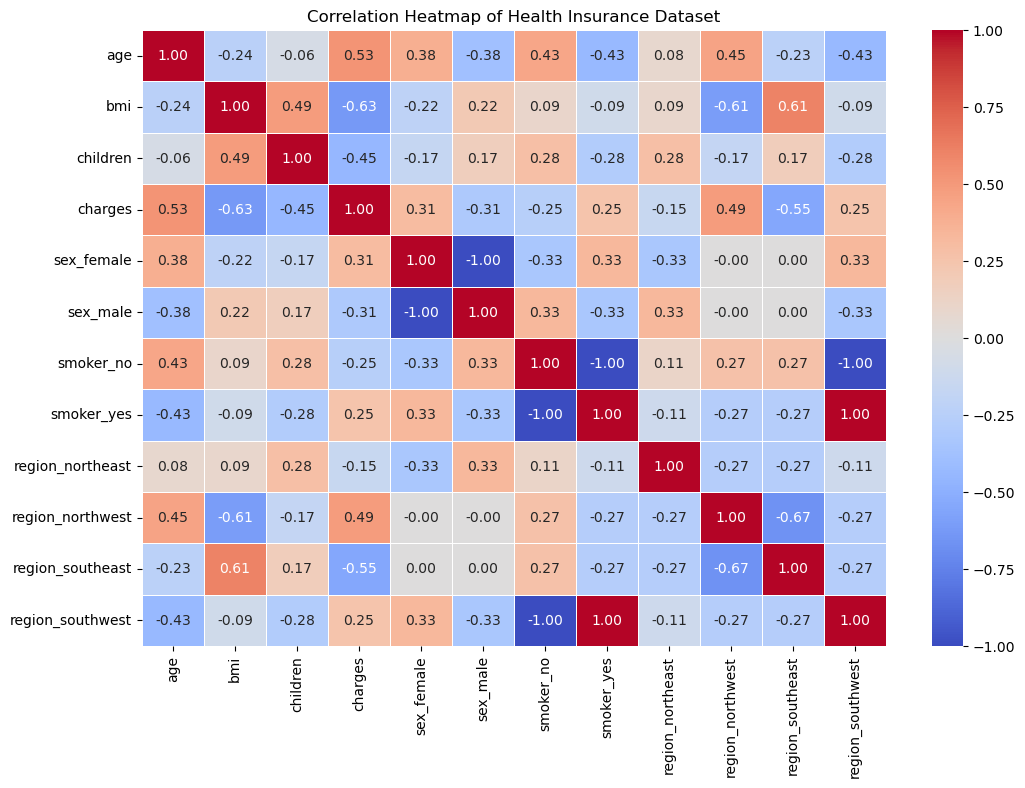

In [40]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.50)

plt.title("Correlation Heatmap of Health Insurance Dataset")

plt.show()

- Age has a moderately positive correlation with charges, implying charges tend to increase as age increases.
- Being a smoker ('smoker_yes') shows a strong positive correlation with charges, indicating that smokers generally face higher charges.
- BMI has a slight positive correlation with charges, suggesting a higher BMI may have slightly higher charges.
- 'smoker_no' has a moderate negative correlation with charges, indicating non-smokers tend to incur lower charges.
- The presence of children shows a slight negative correlation with charges, suggesting that having more children might be associated with slightly lower charges.
- 'region_southwest' has a small negative correlation with charges, indicating this region might have slightly lower charges compared to others.

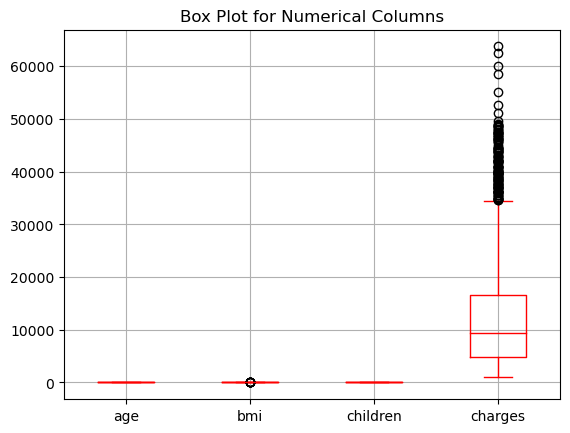

In [41]:
df.boxplot(column=['age','bmi','children','charges'], color='red')

plt.title('Box Plot for Numerical Columns')

plt.show()

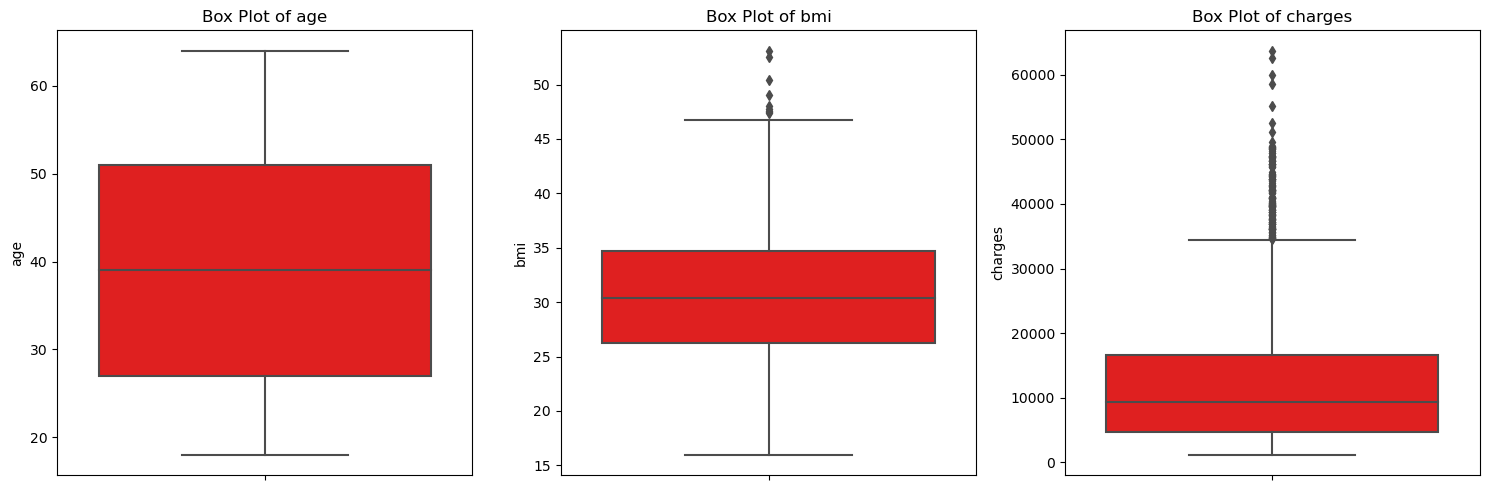

In [42]:
numerical_vars = ['age', 'bmi', 'charges']

plt.figure(figsize=(15, 5))

for i, var in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[var], color='red')
    plt.title(f'Box Plot of {var}')

plt.tight_layout()

plt.show()

- The box plots for age and bmi are symmetrically distributed with a few outliers, while charges display a right-skewed distribution with many outliers, indicating a spread of high charges above the median value. 
- Depending on the data and the domain, removing these outliers may cause the model to represent the wrong results for the high-cost data if trained without peaking values. 
- Therefore, we will keep the outliers for the final regression analysis.

# Model Developement

- Model development is a crucial phase in machine learning, where the goal is to create a model that can accurately predict or make decisions based on data.
- Model development is an iterative process, and it often involves going back and forth between different steps to refine the model and achieve the best possible performance.

In [43]:
X = encoded_data.drop('charges', axis=1)  # Features (excluding 'charges')
y = encoded_data['charges']  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set_size = X_train.shape[0] # Output the size of the training sets
test_set_size = X_test.shape[0] # Output the size of the testing sets

train_set_size, test_set_size

(1069, 268)

- Splitted the data in training 80% and test 20%

In [44]:
lr_model = LinearRegression() # Creating a linear regression model

lr_model.fit(X_train, y_train) # Training the model on the training set

"Model Trained"

'Model Trained'

- The model is now trained. Next step is to evaluate its performance.

In [45]:
y_pred = lr_model.predict(X_test) # Predicting the charges using the testing set

r_squared = r2_score(y_test, y_pred) # Calculating R-squared and Mean Squared Error

mse = mean_squared_error(y_test, y_pred)

r_squared, mse

(0.806928708119801, 0.24208632037687325)

- Evaluated the model performance using appropriate metrixs (e.g., R-squared, Mean Squared Error).


- R-squared (Coefficient of Determination): 0.8069
This value indicates that approximately 80.69% of the variance in the target variable (charges) can be explained by the features in your model. A higher R-squared value suggests a better fit.


- Mean Squared Error (MSE): 0.2421
MSE is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates that, on average, the model's predictions are closer to the true values.

In [49]:
r_squared_percentage = r_squared * 100
mse_percentage = mse * 100

print(f"R-squared: {r_squared_percentage:.2f}%")
print(f"Mean Squared Error: {mse_percentage:.2f}%")

R-squared: 80.69%
Mean Squared Error: 24.21%


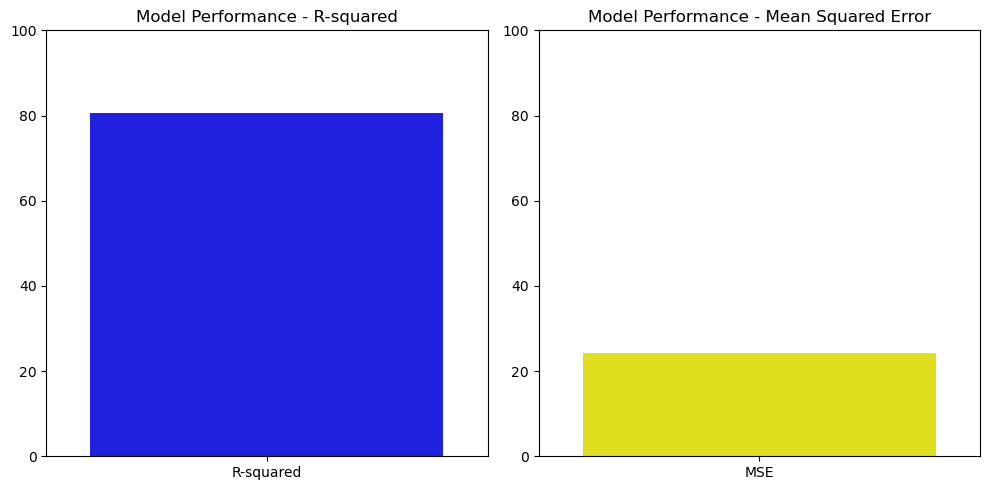

In [55]:
r_squared_percentage = r_squared * 100
mse_percentage = mse * 100

plt.figure(figsize=(10, 5))

# Bar plot for R-squared
plt.subplot(1, 2, 1)

sns.barplot(x=['R-squared'], y=[r_squared_percentage], color='blue')

plt.title('Model Performance - R-squared')

plt.ylim(0, 100)

# Bar plot for MSE
plt.subplot(1, 2, 2)

sns.barplot(x=['MSE'], y=[mse_percentage], color='yellow')

plt.title('Model Performance - Mean Squared Error')

plt.ylim(0, 100)

plt.tight_layout()

plt.show()

In [46]:
coefficients = lr_model.coef_ # Extracting the coefficients of the linear regression model

# Creating a DataFrame for better visualization
features = X.columns
coefficients_df = pd.DataFrame(coefficients, features, columns=['Coefficient'])

coefficients_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_yes,0.953167
age,0.287849
bmi,0.160543
children,0.053060
region_northeast,0.039027
region_northwest,0.006666
sex_female,0.004194
sex_male,-0.004194
region_southwest,-0.015421
region_southeast,-0.030272


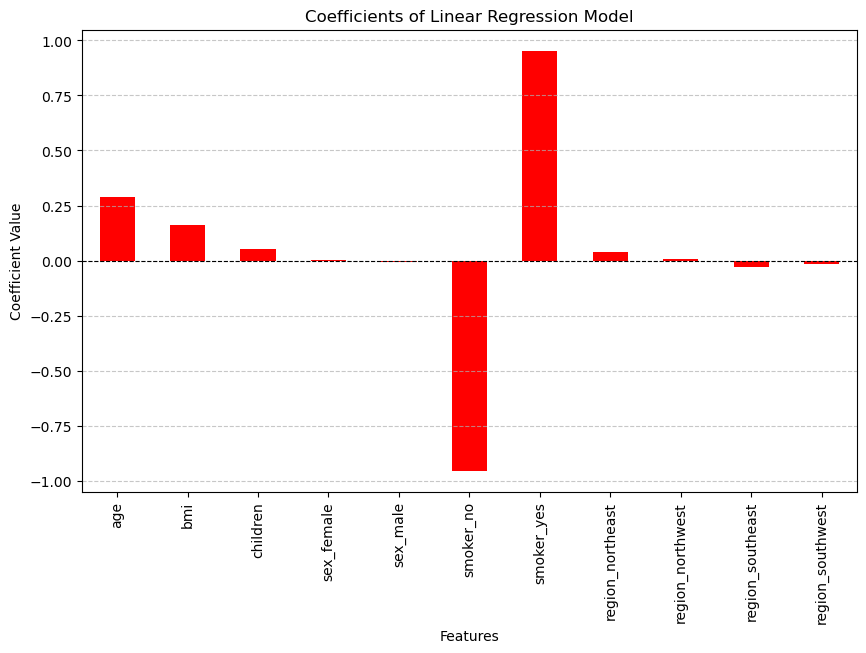

In [47]:
# Visualization of the coefficients in a bar plot

plt.figure(figsize=(10, 6))

coefficients_df['Coefficient'].plot(kind='bar', color='red')

plt.title('Coefficients of Linear Regression Model')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')

plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Model Inference

- 'smoker_yes' has the strongest positive coefficient, indicating that being a smoker is the most important predictor of higher charges.
- 'age' and 'bmi' also have positive coefficients, but less than smoking, showing that older age and higher BMI are associated with increased charges, but to a lesser extent.
- 'children' and the regions 'northeast' and 'northwest' have very small positive coefficients, suggesting a minor relationship with higher charges.
- 'sex_female' and'sex_male' have coefficients that are next to zero, indicating that sex has almost no linear relationship with charges.
- Negative coefficients for'region_southwest','region_southeast'', 'region_southeast', and 'smoker_no' indicate these are associated with lower charges, with non-smokers ('smoker_no') having the largest negative effect, indicating the positive impact of'smoker_yes'.


# Random Forest Regression Model

In [56]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict charges on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate model performance
rf_r_squared = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

print(f"Random Forest Model Accuracy (R-squared): {rf_r_squared:.4f}")
print(f"Random Forest Model MSE: {rf_mse:.4f}")


Random Forest Model Accuracy (R-squared): 0.8823
Random Forest Model MSE: 0.1476


- Random Forest Model Accuracy (R-squared): 0.8823
This R-squared value indicates that approximately 88.23% of the variance in healthcare insurance charges is explained by the Random Forest model. A higher R-squared value suggests a better fit.


- Random Forest Model MSE (Mean Squared Error): 0.1476
The Mean Squared Error, represented as 0.1476, signifies the average squared difference between predicted and actual charges. A lower MSE indicates better predictive accuracy.

In [68]:
rf_r_squared_percentage = rf_r_squared * 100

rf_mse_percentage = rf_mse * 100

print(f"Random Forest Model Accuracy (R-squared): {rf_r_squared_percentage:.2f}%")
print(f"Random Forest Model MSE: {rf_mse_percentage:.2f}%")

Random Forest Model Accuracy (R-squared): 88.23%
Random Forest Model MSE: 14.76%


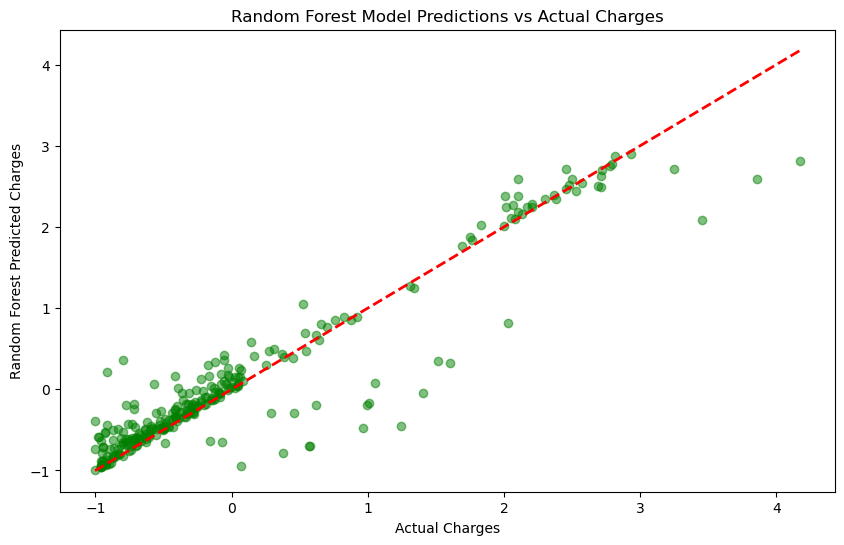

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, rf_y_pred, alpha=0.5, color='green')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Random Forest Model Predictions vs Actual Charges')

plt.xlabel('Actual Charges')
plt.ylabel('Random Forest Predicted Charges')

plt.show()


In this scatter plot:

- Each point represents a data point in test set.
- The x-axis represents the actual charges.
- The y-axis represents the Random Forest predicted charges.
- The red dashed line represents a perfect alignment where predicted charges equal actual charges.

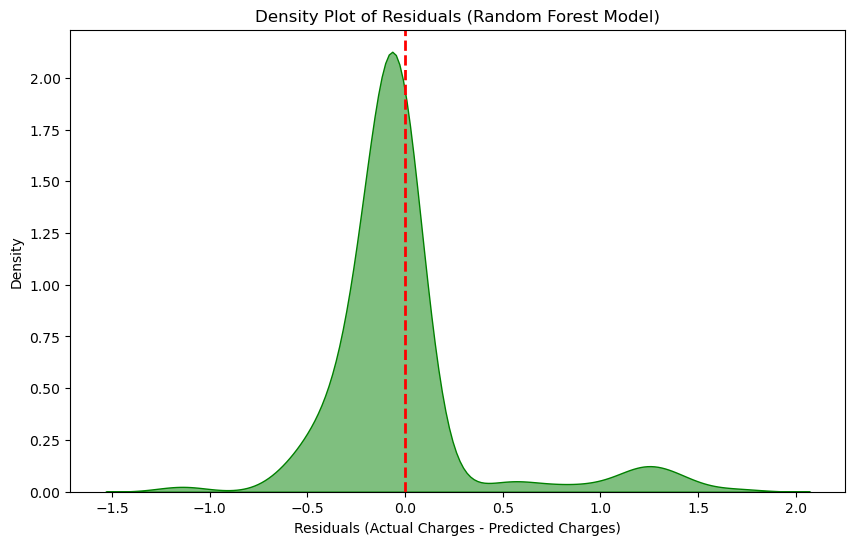

In [67]:
residuals = y_test - rf_y_pred

plt.figure(figsize=(10, 6))

sns.kdeplot(residuals, fill=True, color='green', alpha=0.5)

plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.title('Density Plot of Residuals (Random Forest Model)')

plt.xlabel('Residuals (Actual Charges - Predicted Charges)')
plt.ylabel('Density')

plt.show()


In this density plot:

- The x-axis represents the residuals (the differences between actual charges and Random Forest predicted charges).
- The y-axis represents the density of the distribution.

The red dashed line at 0 represents perfect predictions. If the density plot is centered around 0, it indicates that the model's predictions are generally accurate. A wider distribution might suggest areas where the model has more difficulty predicting charges accurately

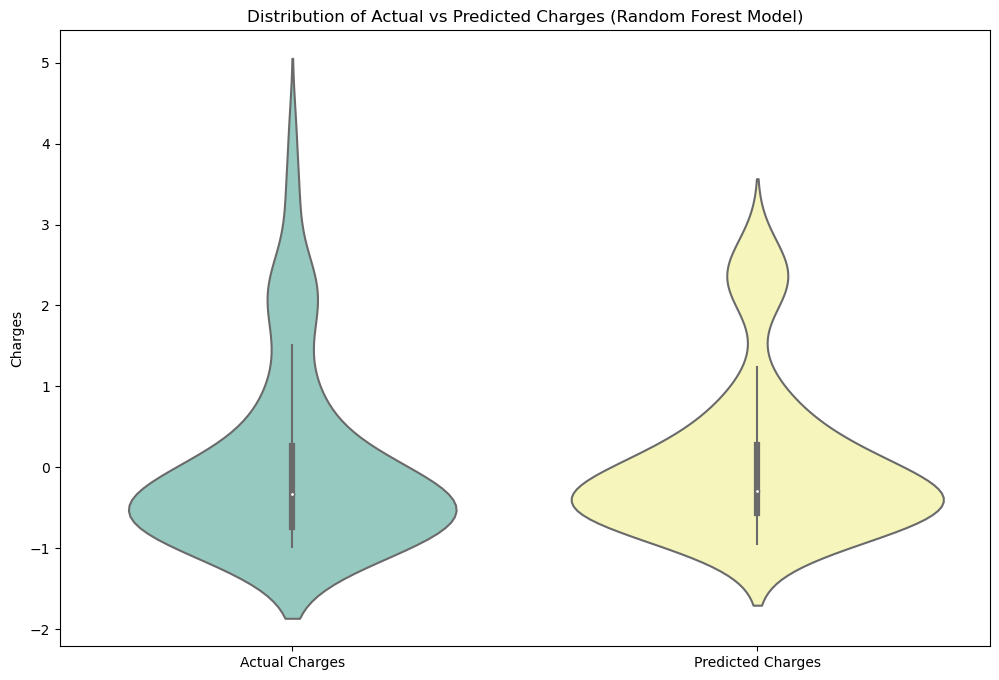

In [74]:
num_data_points = 100  # Number of data points to visualize

fig, ax = plt.subplots(figsize=(12, 8))

# Combining actual and predicted charges into a DataFrame for easier plotting
plot_data = pd.DataFrame({'Actual Charges': y_test[:num_data_points], 'Predicted Charges': rf_y_pred[:num_data_points]})

sns.violinplot(data=plot_data, palette="Set3", ax=ax)

ax.set_title('Distribution of Actual vs Predicted Charges (Random Forest Model)')

ax.set_ylabel('Charges')

plt.show()

In this violin plot:

- There are two violins for each data point, one for actual charges and one for predicted charges.
- The width of the violin represents the density of charges at different values.
- The central tendency and spread of the charges are visualized for both actual and predicted values.

# Gradient Boosting Model

In [76]:
gb_model = GradientBoostingRegressor() # Creating a Gradient Boosting model

gb_model.fit(X_train, y_train) # Fiting the model to the training data

gb_y_pred = gb_model.predict(X_test)  # Predict charges using the Gradient Boosting model

# Evaluating the performance of the Gradient Boosting model
gb_r_squared = gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)

print(f"Gradient Boosting Model Accuracy (R-squared): {gb_r_squared:.4f}")
print(f"Gradient Boosting Model MSE: {gb_mse:.4f}")

Gradient Boosting Model Accuracy (R-squared): 0.9014
Gradient Boosting Model MSE: 0.1237


- Gradient Boosting Model Accuracy (R-squared): 90.14%
This R-squared value indicates that approximately 90.14% of the variance in healthcare insurance charges is explained by the Gradient Boosting model. A higher R-squared value suggests a better fit.

- Gradient Boosting Model MSE (Mean Squared Error): 12.37%
The Mean Squared Error, represented as 0.1237, signifies the average squared difference between predicted and actual charges. A lower MSE indicates better predictive accuracy.

In [78]:
gb_r_squared_percentage = gb_r_squared * 100

gb_mse_percentage = gb_mse * 100

print(f"Gradient Boosting Model Accuracy (R-squared): {gb_r_squared_percentage:.2f}%")
print(f"Gradient Boosting Model MSE: {gb_mse_percentage:.2f}%")

Gradient Boosting Model Accuracy (R-squared): 90.14%
Gradient Boosting Model MSE: 12.37%


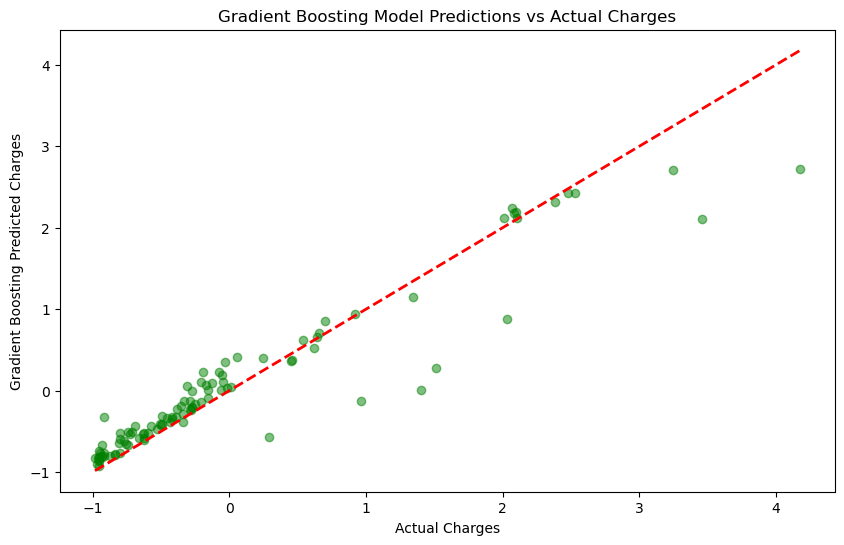

In [79]:

num_data_points = 100  # Choose the number of data points to visualize

plt.figure(figsize=(10, 6))

plt.scatter(y_test[:num_data_points], gb_y_pred[:num_data_points], alpha=0.5, color='green')
plt.plot([min(y_test[:num_data_points]), max(y_test[:num_data_points])], 
         [min(y_test[:num_data_points]), max(y_test[:num_data_points])], linestyle='--', color='red', linewidth=2)

plt.title('Gradient Boosting Model Predictions vs Actual Charges')

plt.xlabel('Actual Charges')
plt.ylabel('Gradient Boosting Predicted Charges')

plt.show()

In this scatter plot:

- Each point represents a data point in test set.
- The x-axis represents the actual charges.
- The y-axis represents the Gradient Boosting predicted charges.
- The red dashed line represents a perfect alignment where predicted charges equal actual charges.
This visualization allows you to qualitatively assess how well the model's predictions align with the actual charges. If the points cluster closely around the red dashed line, it indicates accurate predictions

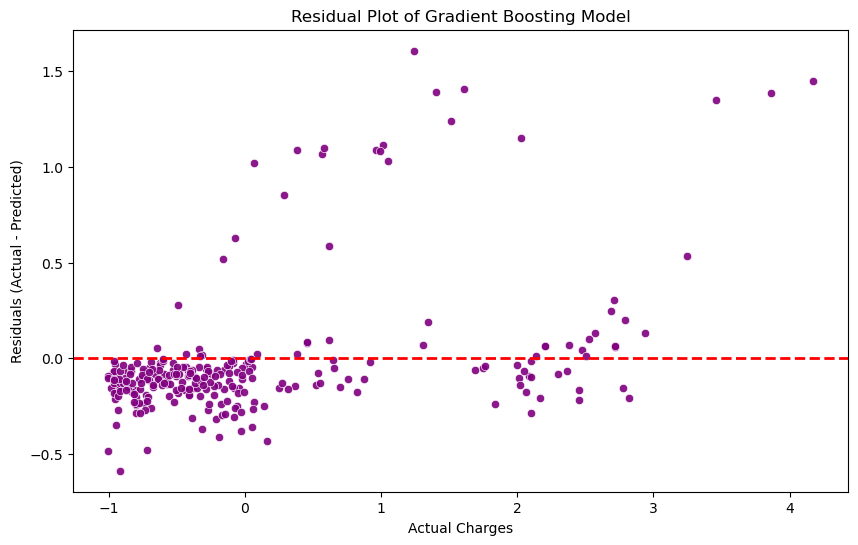

In [83]:
residuals = y_test - gb_y_pred

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=residuals, color='purple', alpha=0.9)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Residual Plot of Gradient Boosting Model')

plt.xlabel('Actual Charges')
plt.ylabel('Residuals (Actual - Predicted)')

plt.show()


In this residual plot:

- Each point represents a data point in test set.
- The x-axis represents the actual charges.
- The y-axis represents the residuals (the differences between actual and predicted charges).
- The red dashed line represents the zero line, indicating perfect predictions.

Key observations:

- If the points are scattered randomly around the zero line, it suggests that the model is making unbiased predictions.
- If there's a pattern or trend in the residuals, it might indicate areas where the model is consistently over- or underpredicting.